## 分类
### MINIST
    激励函数：Softmax

#### 供给数据
   * TensorFlow  可以直接通过Session的run和eval函数feed_dict参数，启动运算时传入参数
   * 文件中读取
   * 预加载数据
   * 多管闲输入

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Hello World
hello = tf.constant('Hello, World!')
with tf.Session() as sess:
    print sess.run(hello)

Hello, World!


In [7]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.mul(a, b)
with tf.Session() as sess:
    print sess.run(add, feed_dict={a : 2, b : 3})
    print sess.run(mul, feed_dict={a : 4, b : 3})

5
12


<type 'module'>
17
Epoch: 0001 cost= 0.137703463 W= 0.351947 b= -0.0837049
Epoch: 0051 cost= 0.096857980 W= 0.297421 b= 0.345177
Epoch: 0101 cost= 0.085945621 W= 0.26773 b= 0.569652
Epoch: 0151 cost= 0.082781799 W= 0.252177 b= 0.687239
Epoch: 0201 cost= 0.081824839 W= 0.24403 b= 0.748835
Epoch: 0251 cost= 0.081515729 W= 0.239762 b= 0.781101
Epoch: 0301 cost= 0.081406549 W= 0.237526 b= 0.798003
Epoch: 0351 cost= 0.081363857 W= 0.236355 b= 0.806857
Epoch: 0401 cost= 0.081345409 W= 0.235742 b= 0.811494
Epoch: 0451 cost= 0.081336863 W= 0.235421 b= 0.813923
Epoch: 0501 cost= 0.081332684 W= 0.235252 b= 0.815196
Epoch: 0551 cost= 0.081330590 W= 0.235164 b= 0.815863
Epoch: 0601 cost= 0.081329480 W= 0.235118 b= 0.816212
Epoch: 0651 cost= 0.081328928 W= 0.235094 b= 0.816396
Epoch: 0701 cost= 0.081328638 W= 0.235081 b= 0.816493
Epoch: 0751 cost= 0.081328489 W= 0.235074 b= 0.81654
Epoch: 0801 cost= 0.081328407 W= 0.235071 b= 0.816566
Epoch: 0851 cost= 0.081328385 W= 0.235069 b= 0.816581
Epoch: 090

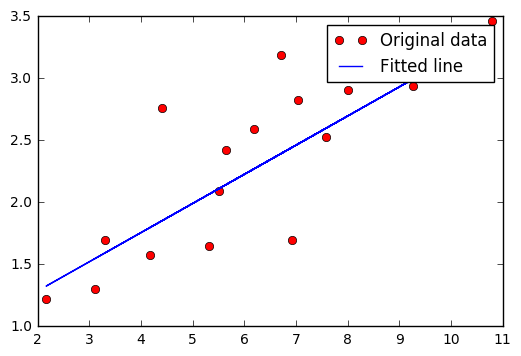

In [23]:
rng = np.random
print type(rng)

learning_rate = 0.1
training_epochs = 1000
display_step = 50

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]
print n_samples

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

activation = tf.add(tf.mul(w, x), b)

cost = tf.reduce_sum(tf.pow(activation - y, 2)) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (m, n) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={x : m, y : n})
            
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={x: train_X, y:train_Y})), \
                "W=", sess.run(w), "b=", sess.run(b)
    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={x: train_X, y: train_Y}), \
          "W=", sess.run(w), "b=", sess.run(b)
        
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()